In [1]:
# Import
from textblob import TextBlob
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Initialize arrays
headline_dates = []
headline_polarity = []

# Reads headlines from csv file 
with open("abcnews-date-text.csv", 'r') as file:
    csvreader = csv.reader(file)

    # Reads headline and determines polarity 
    for row in csvreader:
        # Append date to headline_dates
        headline_dates.append(row[0])

        # Append polarity value to headline_dates
        current_headline = TextBlob(row[1])
        headline_polarity.append(current_headline.sentiment.polarity)

In [3]:
# Removes first element of each list
headline_dates.pop(0)
headline_polarity.pop(0)

# Creates a dataframe using pandas
data = {'dates': headline_dates, 'polarity': headline_polarity}
df = pd.DataFrame(data=data)

# Converts dataframe to csv file
df.to_csv('pre_trained_polarity.csv')

In [4]:
# Create empty lists to store data for each year
dates_by_year = [[] for i in range(2003, 2022)]
polarity_by_year = [[] for i in range(2003, 2022)]

# Loop through the lists and group them by year
for date, polarity in zip(headline_dates, headline_polarity):
    year = int(date[:4])  # Extract the year from the date string
    index = year - 2003  # Calculate the index to store the data in the correct sublist
    dates_by_year[index].append(date)
    polarity_by_year[index].append(polarity)

In [5]:
# Creates a dataframe using pandas
data = {'years': dates_by_year, 'polarity': polarity_by_year}
df = pd.DataFrame(data=data)

# Converts dataframe to csv file
df.to_csv('polarity_by_year.csv')

In [6]:
# Initialize array
years = ["2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021"]
average_polarity = []

# Python function to get average of a list
def averageList(list):
    return sum(list) / len(list)

# Finds the average of each year and appends to array
for i in range(len(polarity_by_year)):
    average_polarity.append(averageList(polarity_by_year[i]))

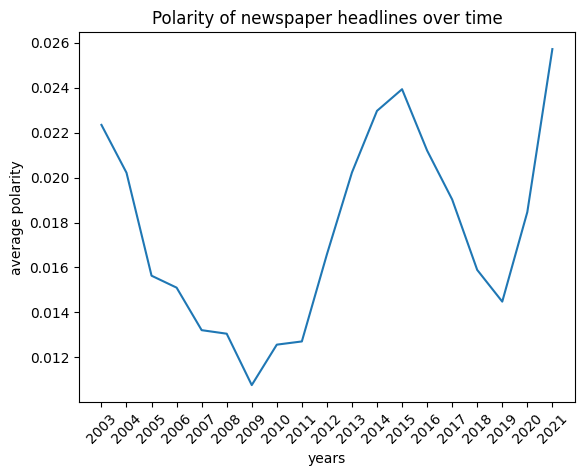

In [7]:
# plotting the points 
plt.plot(years, average_polarity)
  
# naming the x axis
plt.xlabel('years')
# naming the y axis
plt.ylabel('average polarity')
  
# giving a title to my graph
plt.title('Polarity of newspaper headlines over time')

# rotate x axis labels
plt.xticks(rotation = 45)
  
# function to show the plot
plt.show()